# FIFA 20 Player Dataset - Exploratory Data Analysis

## 🔍 Questions to Explore

1. What are the basic characteristics of the dataset?
2. Which countries have the most players?
3. Which clubs have the highest-rated players?
4. What is the distribution of player ages?
5. How does player height/weight relate to their position?
6. Who are the top 10 players by overall rating?
7. How do attributes vary by position (e.g., attackers vs defenders)?
8. How do wages relate to overall performance?
9. What is the distribution of preferred foot?
10. How does potential compare to overall?

### 1. Load and Preview the Dataset 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 104)
sns.set(style="whitegrid")

# Load the dataset
fifa = pd.read_csv("datasets/players_20.csv")

# Preview the dataset
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

### 2. Basic Info and Missing Values

In [78]:
# Basic information
fifa.info()

# Check for missing values
fifa.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


loaned_from             17230
nation_position         17152
nation_jersey_number    17152
player_tags             16779
gk_kicking              16242
gk_diving               16242
gk_handling             16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
defending                2036
pace                     2036
passing                  2036
dribbling                2036
rs                       2036
lam                      2036
cam                      2036
rw                       2036
rf                       2036
dtype: int64

In [4]:
fifa.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [5]:
for col in fifa.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [6]:
fifa.shape

(18278, 104)

In [10]:
18278 * 104 # Total cells

1900912

### 3. Basic Statistics

In [80]:
# Descriptive statistics
fifa.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

### 4. Top Nationalities by Player Count

C:\Users\Yahya\AppData\Local\Temp\ipykernel_964\2783233537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nations.values, y=top_nations.index, palette='viridis')


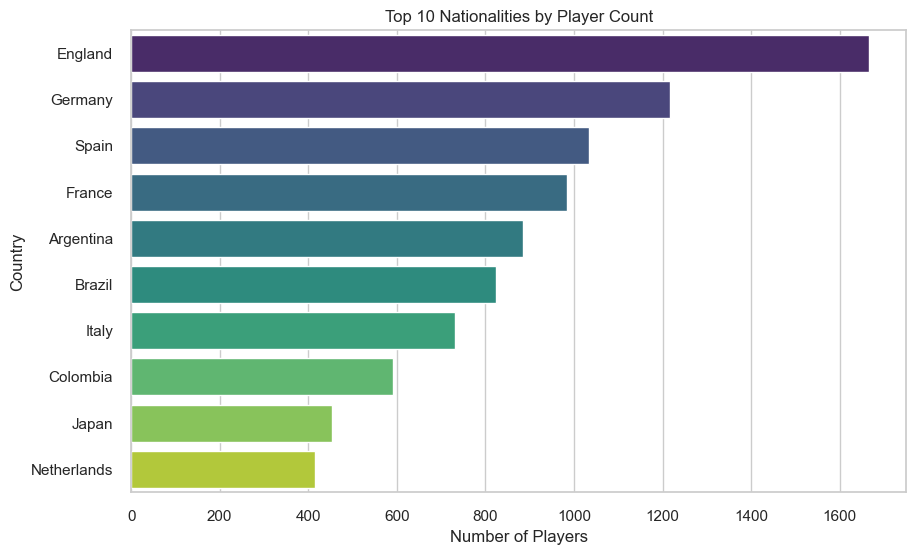

In [81]:
top_nations = fifa['nationality'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_nations.values, y=top_nations.index, palette='viridis')
plt.title('Top 10 Nationalities by Player Count')
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.show()

### 5. Top Clubs by Average Overall Rating

C:\Users\Yahya\AppData\Local\Temp\ipykernel_964\4069014524.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='magma')


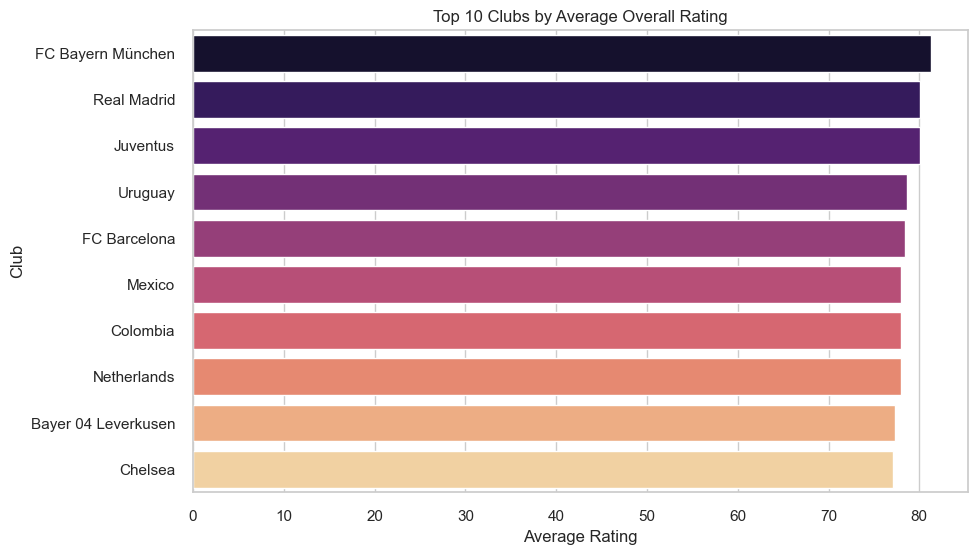

In [ ]:
top_clubs = fifa.groupby('club')['overall'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='magma')
plt.title('Top 10 Clubs by Average Overall Rating')
plt.xlabel('Average Rating')
plt.ylabel('Club')
plt.show()

### 6. Age Distribution

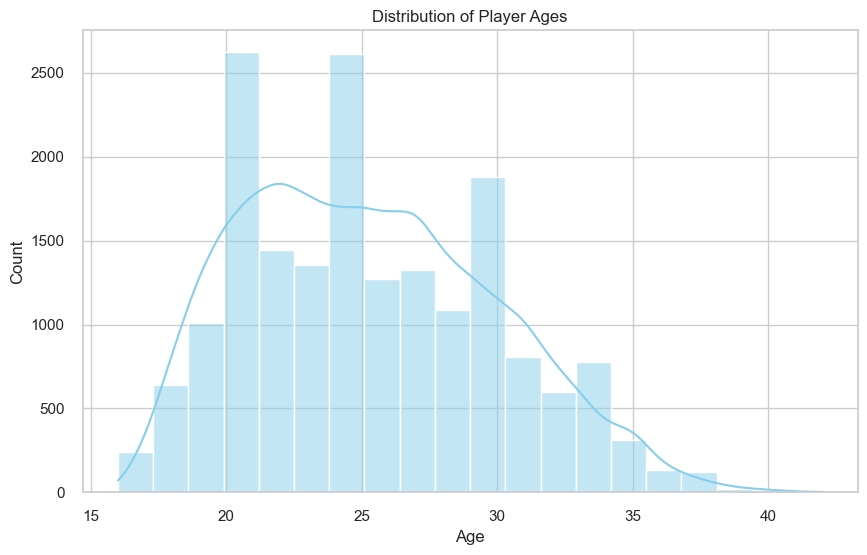

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(fifa['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 7. Height and Weight by Position

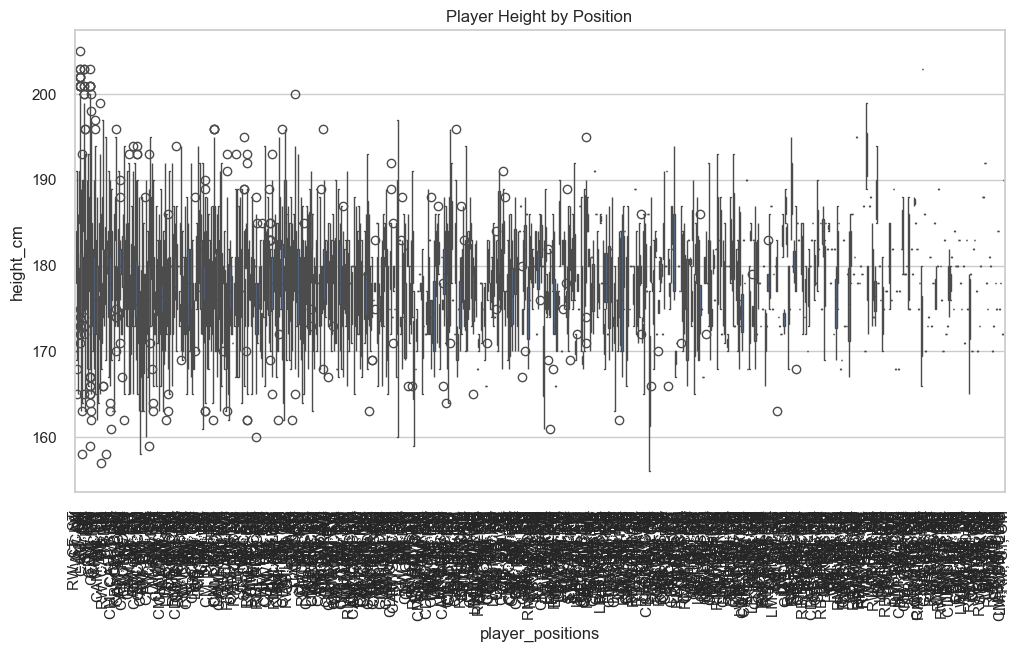

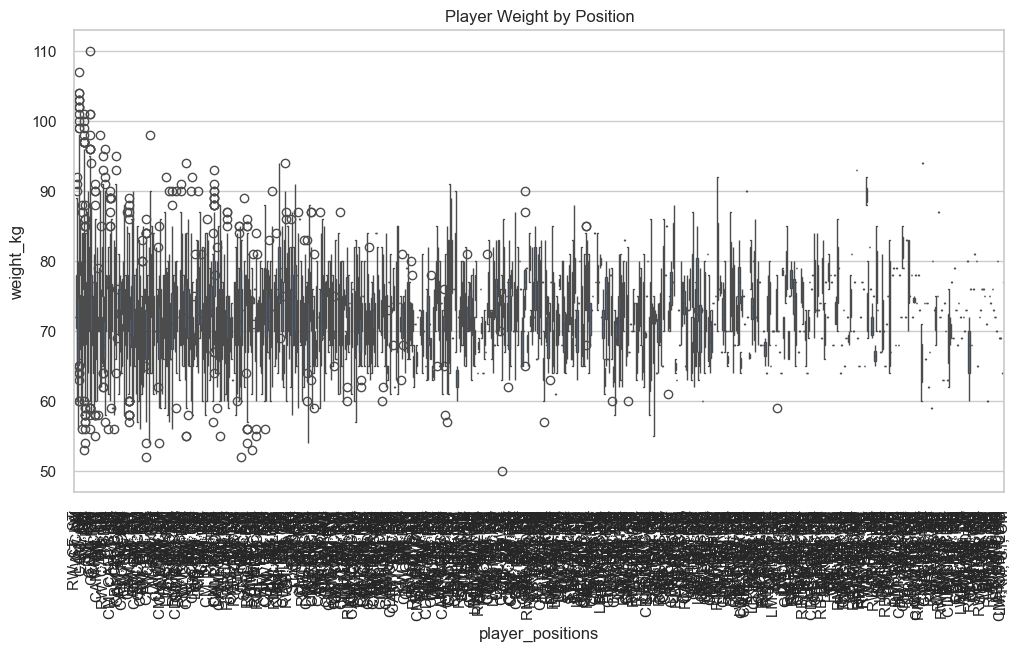

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='player_positions', y='height_cm', data=fifa)
plt.xticks(rotation=90)
plt.title('Player Height by Position')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='player_positions', y='weight_kg', data=fifa)
plt.xticks(rotation=90)
plt.title('Player Weight by Position')
plt.show()

### 8. Top 10 Players by Overall Rating

In [85]:
top_players = fifa[['short_name', 'club', 'nationality', 'overall', 'potential']].sort_values(by='overall', ascending=False).head(10)
top_players

,short_name,club,nationality,overall,potential
0,L. Messi,FC Barcelona,Argentina,94,94
1,Cristiano Ronaldo,Juventus,Portugal,93,93
2,Neymar Jr,Paris Saint-Germain,Brazil,92,92
3,J. Oblak,Atlético Madrid,Slovenia,91,93
4,E. Hazard,Real Madrid,Belgium,91,91
5,K. De Bruyne,Manchester City,Belgium,91,91
6,M. ter Stegen,FC Barcelona,Germany,90,93
8,L. Modrić,Real Madrid,Croatia,90,90
7,V. van Dijk,Liverpool,Netherlands,90,91
9,M. Salah,Liverpool,Egypt,90,90


### 9. Player Attributes by General Position Category

C:\Users\Yahya\AppData\Local\Temp\ipykernel_964\3012989103.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='general_pos', y='overall', data=fifa, palette='Set2')


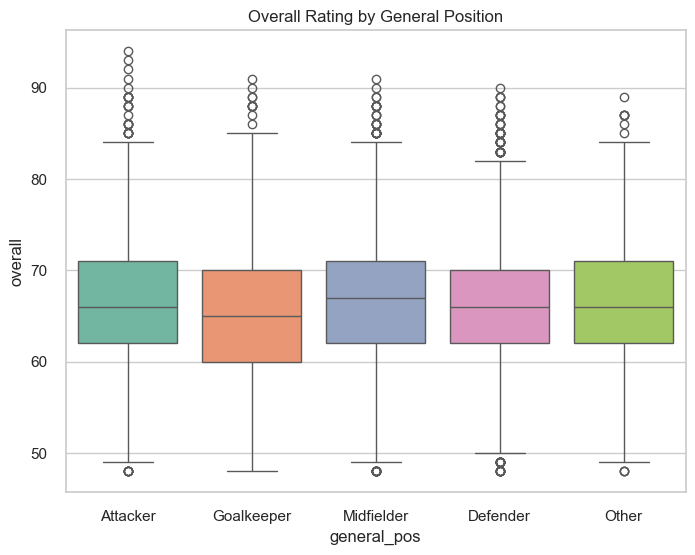

In [86]:
def get_general_position(pos):
    if 'GK' in pos:
        return 'Goalkeeper'
    elif 'CB' in pos or 'LB' in pos or 'RB' in pos:
        return 'Defender'
    elif 'CM' in pos or 'CDM' in pos or 'CAM' in pos:
        return 'Midfielder'
    elif 'ST' in pos or 'LW' in pos or 'RW' in pos:
        return 'Attacker'
    return 'Other'

fifa['general_pos'] = fifa['player_positions'].apply(lambda x: get_general_position(x.split(',')[0]))

plt.figure(figsize=(8, 6))
sns.boxplot(x='general_pos', y='overall', data=fifa, palette='Set2')
plt.title('Overall Rating by General Position')
plt.show()

### 10. Wages vs Overall Rating

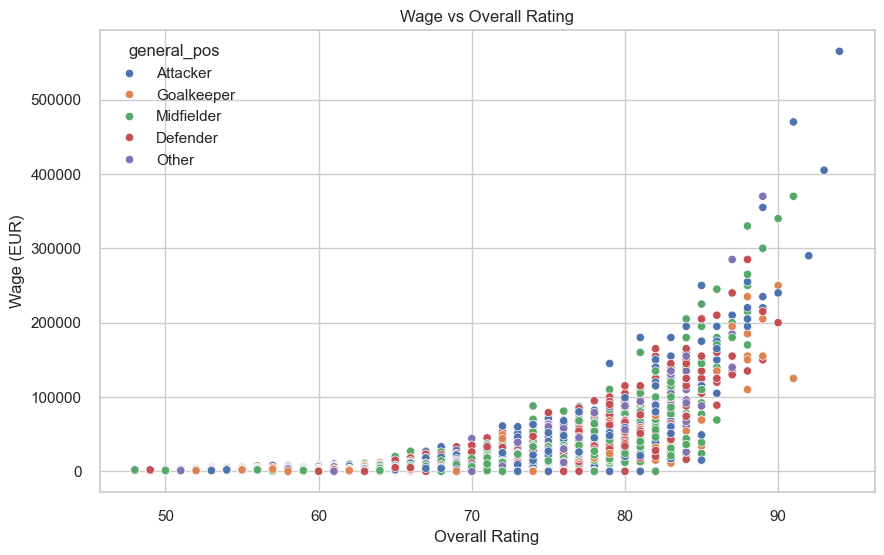

In [87]:
# Clean wage column if necessary
if 'wage_eur' in fifa.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='overall', y='wage_eur', data=fifa, hue='general_pos')
    plt.title('Wage vs Overall Rating')
    plt.xlabel('Overall Rating')
    plt.ylabel('Wage (EUR)')
    plt.show()

### 11. Preferred Foot Distribution

C:\Users\Yahya\AppData\Local\Temp\ipykernel_964\1467536530.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_foot', data=fifa, palette='coolwarm')


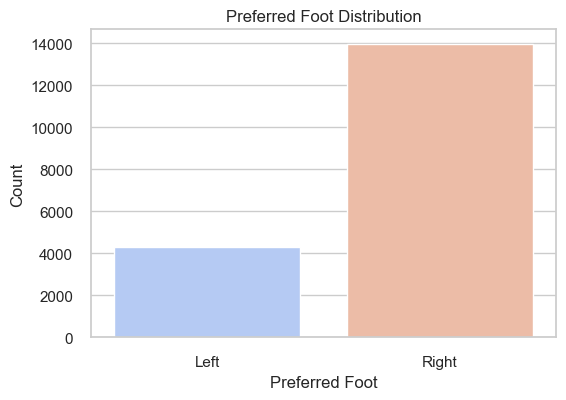

In [88]:
plt.figure(figsize=(6, 4))
sns.countplot(x='preferred_foot', data=fifa, palette='coolwarm')
plt.title('Preferred Foot Distribution')
plt.xlabel('Preferred Foot')
plt.ylabel('Count')
plt.show()

### 12. Potential vs Overall

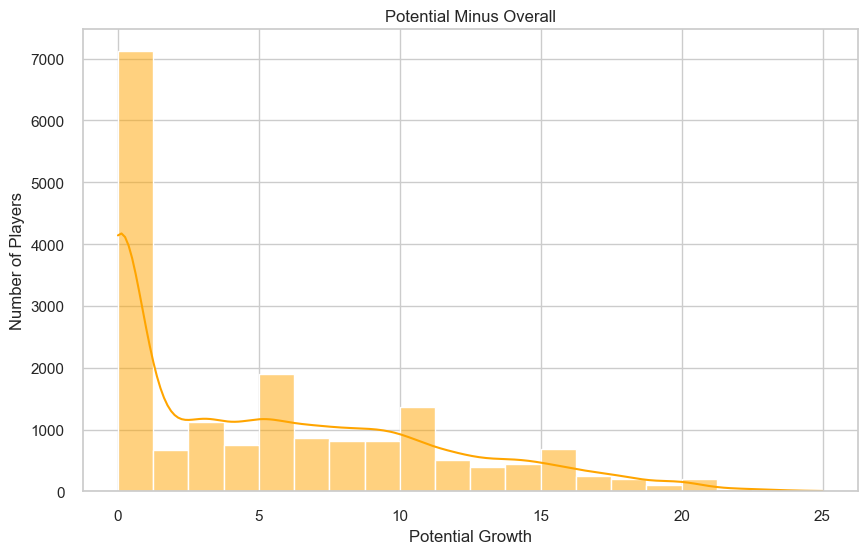

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(fifa['potential'] - fifa['overall'], bins=20, kde=True, color='orange')
plt.title('Potential Minus Overall')
plt.xlabel('Potential Growth')
plt.ylabel('Number of Players')
plt.show()

## More EDA on the dataset.

In [11]:
fifa["nationality"].value_counts()

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
               ... 
Malawi            1
Gibraltar         1
Macau             1
South Sudan       1
Indonesia         1
Name: count, Length: 162, dtype: int64

In [12]:
fifa["nationality"].value_counts()[0:10]

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64

### Top 5 countries

In [16]:
top_5_team_names = list(fifa["nationality"].value_counts()[0:5].keys())

In [19]:
top_5_team = list(fifa["nationality"].value_counts()[0:5])

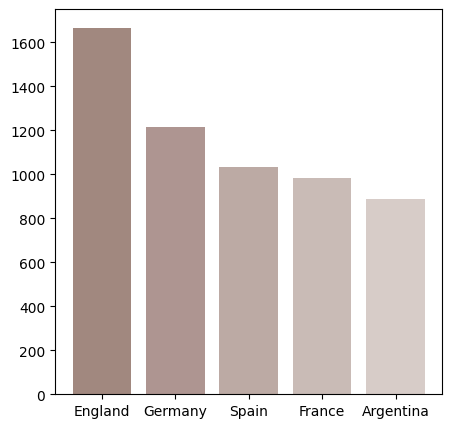

In [23]:
plt.figure(figsize=(5,5))
plt.bar(top_5_team_names, 
        top_5_team, 
        color=["#a1887f", "#ae9591", "#bcaaa4", "#c9bbb6", "#d7ccc8"]);

In [24]:
player_salary = fifa[["short_name", "wage_eur"]]

In [25]:
player_salary.head()

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


In [26]:
player_salary = player_salary.sort_values(by=["wage_eur"], ascending = False)

In [27]:
player_salary.head()

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


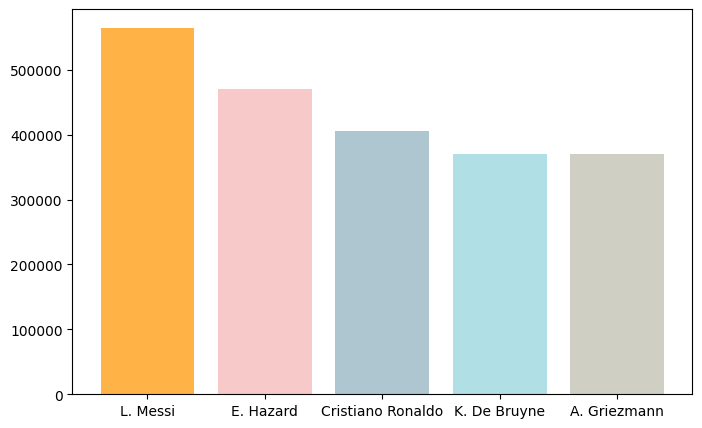

In [30]:
plt.figure(figsize=(8,5))
plt.bar(list(player_salary["short_name"])[0:5], list(player_salary["wage_eur"])[0:5], color=["#ffb347", "#f7cac9", "#aec6cf", "#b0e0e6", "#cfcfc4"]);

In [31]:
fifa["nationality"] == "Germany"

0        False
1        False
2        False
3        False
4        False
         ...  
18273    False
18274    False
18275    False
18276    False
18277    False
Name: nationality, Length: 18278, dtype: bool

In [34]:
# Germany
fifa[fifa["nationality"] == "Germany"]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18123,252076,https://sofifa.com/player/252076/lukas-schelle...,L. Schellenberg,Lukas Schellenberg,18,2000-08-02,183,78,Germany,FC Ingolstadt 04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18156,251856,https://sofifa.com/player/251856/dominik-meise...,D. Meisel,Dominik Meisel,20,1999-06-29,179,68,Germany,FC Würzburger Kickers,...,44+2,44+2,44+2,44+2,44+2,44+2,41+2,41+2,41+2,44+2
18186,243537,https://sofifa.com/player/243537/maximilian-br...,M. Breunig,Maximilian Breunig,18,2000-08-14,178,67,Germany,FC Würzburger Kickers,...,37+2,32+2,32+2,32+2,37+2,35+2,30+2,30+2,30+2,35+2
18191,244043,https://sofifa.com/player/244043/nico-stephan/...,N. Stephan,Nico Stephan,18,2000-08-24,191,84,Germany,FC Würzburger Kickers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
germany = fifa[fifa["nationality"] == "Germany"]

In [36]:
germany.sort_values(by=["height_cm"], ascending = False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,236831,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,...,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16184,240218,https://sofifa.com/player/240218/alexander-wei...,A. Weidinger,Alexander Weidinger,22,1997-06-18,197,88,Germany,SSV Jahn Regensburg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11859,167437,https://sofifa.com/player/167437/dominik-stroh...,D. Stroh-Engel,Dominik Stroh-Engel,33,1985-11-27,197,94,Germany,SpVgg Unterhaching,...,39+2,45+2,45+2,45+2,39+2,39+2,47+2,47+2,47+2,39+2


In [37]:
germany.sort_values(by=["weight_kg"], ascending = False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
13576,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,179783,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13201,241388,https://sofifa.com/player/241388/dennis-smarsc...,D. Smarsch,Dennis Smarsch,20,1999-01-14,195,97,Germany,Hertha BSC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
germany.sort_values(by=["wage_eur"], ascending = False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
146,186942,https://sofifa.com/player/186942/ilkay-gundoga...,I. Gündoğan,İlkay Gündoğan,28,1990-10-24,180,80,Germany,Manchester City,...,76+3,79+3,79+3,79+3,76+3,74+3,72+3,72+3,72+3,74+3
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3


In [43]:
top_5 = germany[["short_name", "wage_eur"]].sort_values(by=["wage_eur"], ascending=False).head()

top_5

,short_name,wage_eur
36,T. Kroos,330000
6,M. ter Stegen,250000
55,L. Sané,195000
146,I. Gündoğan,180000
70,T. Müller,170000


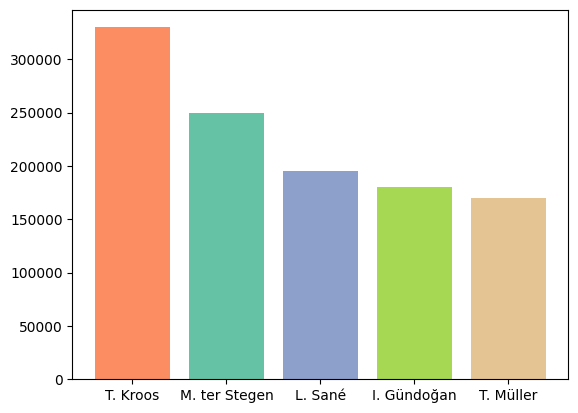

In [46]:
plt.bar(top_5["short_name"], top_5["wage_eur"], color = ["#fc8d62", "#66c2a5", "#8da0cb", "#a6d854", "#e5c494"]);

### Shooting

In [48]:
player_shooting = fifa[["short_name", "shooting"]]

In [50]:
player_shooting.sort_values(by=["shooting"], ascending = False).head()

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
205,F. Quagliarella,89.0


### Defending

In [51]:
player_defending = fifa[["short_name", "defending", "nationality", "club"]]

In [52]:
player_defending.sort_values(by=["defending"], ascending=False). head()

,short_name,defending,nationality,club
7,V. van Dijk,90.0,Netherlands,Liverpool
16,G. Chiellini,90.0,Italy,Juventus
49,M. Hummels,89.0,Germany,Borussia Dortmund
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter


### Real Madrid Stats

In [54]:
real_madrid = fifa[fifa["club"]=="Real Madrid"]

In [56]:
real_madrid.sort_values(by=["wage_eur"], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,...,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
46,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,31,1987-12-19,185,81,France,Real Madrid,...,62+3,62+3,62+3,62+3,62+3,58+3,54+3,54+3,54+3,58+3


In [57]:
real_madrid.sort_values(by=["shooting"], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
100,173731,https://sofifa.com/player/173731/gareth-bale/2...,G. Bale,Gareth Frank Bale,29,1989-07-16,185,82,Wales,Real Madrid,...,72+3,69+3,69+3,69+3,72+3,70+3,66+3,66+3,66+3,70+3
106,198710,https://sofifa.com/player/198710/james-rodrigu...,J. Rodríguez,James David Rodríguez Rubio,27,1991-07-12,180,75,Colombia,Real Madrid,...,67+3,67+3,67+3,67+3,67+3,62+3,57+3,57+3,57+3,62+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
161,232432,https://sofifa.com/player/232432/luka-jovic/20...,L. Jović,Luka Jović,21,1997-12-23,182,85,Serbia,Real Madrid,...,55+2,53+2,53+2,53+2,55+2,51+2,47+2,47+2,47+2,51+2
46,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,31,1987-12-19,185,81,France,Real Madrid,...,62+3,62+3,62+3,62+3,62+3,58+3,54+3,54+3,54+3,58+3


In [55]:
real_madrid.sort_values(by=["defending"], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,...,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
42,200145,https://sofifa.com/player/200145/carlos-henriq...,Casemiro,Carlos Henrique Venancio Casimiro,27,1992-02-23,185,84,Brazil,Real Madrid,...,78+3,84+3,84+3,84+3,78+3,79+3,84+3,84+3,84+3,79+3
76,201535,https://sofifa.com/player/201535/raphael-varan...,R. Varane,Raphaël Varane,26,1993-04-25,191,81,France,Real Madrid,...,74+3,79+3,79+3,79+3,74+3,77+3,83+3,83+3,83+3,77+3
94,204963,https://sofifa.com/player/204963/daniel-carvaj...,Carvajal,Daniel Carvajal Ramos,27,1992-01-11,173,73,Spain,Real Madrid,...,83+3,82+3,82+3,82+3,83+3,83+3,80+3,80+3,80+3,83+3
332,240130,https://sofifa.com/player/240130/eder-gabriel-...,Éder Militão,Éder Gabriel Militão,21,1998-01-18,186,78,Brazil,Real Madrid,...,78+2,76+2,76+2,76+2,78+2,78+2,79+2,79+2,79+2,78+2


### Real Madrid Visualization

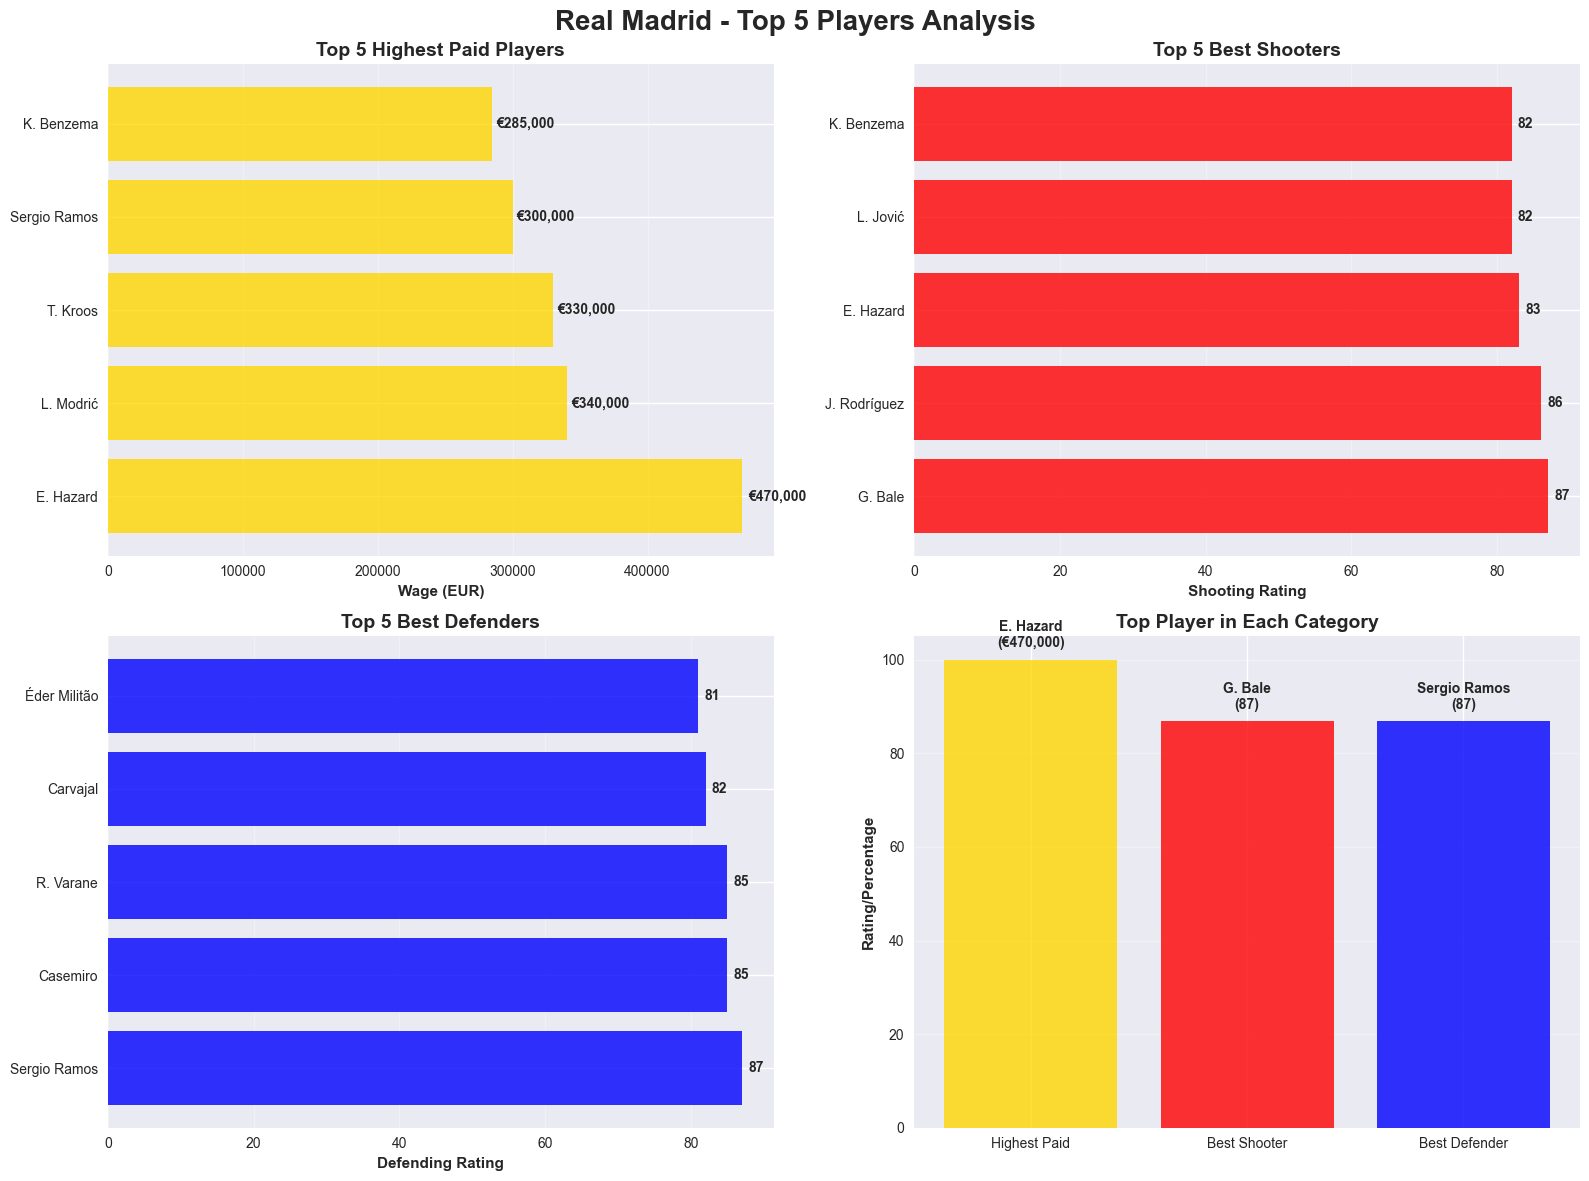

REAL MADRID - TOP PLAYERS SUMMARY

💰 HIGHEST PAID PLAYER:
Player: E. Hazard | Wage: €470,000

⚽ BEST SHOOTER:
Player: G. Bale | Shooting: 87.0

🛡️ BEST DEFENDER:
Player: Sergio Ramos | Defending: 87.0



In [74]:
# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create the visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Real Madrid - Top 5 Players Analysis', fontsize=20, fontweight='bold', y=0.98)

# Top 5 by Wage
top_wage = real_madrid.sort_values(by=["wage_eur"], ascending=False).head()
ax1 = axes[0, 0]
bars1 = ax1.barh(range(len(top_wage)), top_wage['wage_eur'], color='gold', alpha=0.8)
ax1.set_yticks(range(len(top_wage)))
ax1.set_yticklabels(top_wage['short_name'].tolist())
ax1.set_xlabel('Wage (EUR)', fontweight='bold')
ax1.set_title('Top 5 Highest Paid Players', fontweight='bold', fontsize=14)
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'€{width:,.0f}', ha='left', va='center', fontweight='bold')

# Top 5 by Shooting
top_shooting = real_madrid.sort_values(by=["shooting"], ascending=False).head()
ax2 = axes[0, 1]
bars2 = ax2.barh(range(len(top_shooting)), top_shooting['shooting'], color='red', alpha=0.8)
ax2.set_yticks(range(len(top_shooting)))
ax2.set_yticklabels(top_shooting['short_name'].tolist())
ax2.set_xlabel('Shooting Rating', fontweight='bold')
ax2.set_title('Top 5 Best Shooters', fontweight='bold', fontsize=14)
ax2.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.0f}', ha='left', va='center', fontweight='bold')

# Top 5 by Defending
top_defending = real_madrid.sort_values(by=["defending"], ascending=False).head()
ax3 = axes[1, 0]
bars3 = ax3.barh(range(len(top_defending)), top_defending['defending'], color='blue', alpha=0.8)
ax3.set_yticks(range(len(top_defending)))
ax3.set_yticklabels(top_defending['short_name'].tolist())
ax3.set_xlabel('Defending Rating', fontweight='bold')
ax3.set_title('Top 5 Best Defenders', fontweight='bold', fontsize=14)
ax3.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.0f}', ha='left', va='center', fontweight='bold')

# Combined comparison - Top players in each category with names
ax4 = axes[1, 1]

# Get top player from each category with their names
top_wage_player = top_wage.iloc[0]
top_shooting_player = top_shooting.iloc[0]  
top_defending_player = top_defending.iloc[0]

player_names = [
    f"{top_wage_player['short_name']}\n(€{top_wage_player['wage_eur']:,})",
    f"{top_shooting_player['short_name']}\n({top_shooting_player['shooting']:.0f})",
    f"{top_defending_player['short_name']}\n({top_defending_player['defending']:.0f})"
]

# Since we can't normalize different metrics directly, let's show them as percentages of max possible
categories = ['Highest Paid', 'Best Shooter', 'Best Defender']
values = [top_wage_player['wage_eur'] / max(real_madrid['wage_eur']) * 100,
          top_shooting_player['shooting'],
          top_defending_player['defending']]

bars4 = ax4.bar(categories, values, color=['gold', 'red', 'blue'], alpha=0.8)
ax4.set_ylabel('Rating/Percentage', fontweight='bold')
ax4.set_title('Top Player in Each Category', fontweight='bold', fontsize=14)
ax4.grid(axis='y', alpha=0.3)

# Add player names and values above bars
for i, (bar, name) in enumerate(zip(bars4, player_names)):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height + height*0.02, 
            name, ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print("="*60)
print("REAL MADRID - TOP PLAYERS SUMMARY")
print("="*60)

print(f"\n💰 HIGHEST PAID PLAYER:")
top_paid = real_madrid.loc[real_madrid['wage_eur'].idxmax()]
print(f"Player: {top_paid['short_name']} | Wage: €{top_paid['wage_eur']:,}")

print(f"\n⚽ BEST SHOOTER:")
best_shooter = real_madrid.loc[real_madrid['shooting'].idxmax()]
print(f"Player: {best_shooter['short_name']} | Shooting: {best_shooter['shooting']}")

print(f"\n🛡️ BEST DEFENDER:")
best_defender = real_madrid.loc[real_madrid['defending'].idxmax()]
print(f"Player: {best_defender['short_name']} | Defending: {best_defender['defending']}")

print("\n" + "="*60)

In [75]:
real_madrid["nationality"].value_counts()

nationality
Spain                 13
Brazil                 6
France                 3
Belgium                2
Croatia                1
Germany                1
Costa Rica             1
Wales                  1
Colombia               1
Serbia                 1
Dominican Republic     1
Uruguay                1
Japan                  1
Name: count, dtype: int64